In [1]:
#Ethan Plank's individual portion
#imports
#any code marked as "Not mine" is from https://www.kaggle.com/code/hariasawa/96-model-accuracy-income-prediction-2017-data
# or https://www.kaggle.com/code/yaseminturker/ml-models-for-income-estimation
import math
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.4f}'.format})

import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from numpy import arange


from matplotlib import pyplot

%matplotlib inline
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#My code
#getting data, showing preview of it
df = pd.read_csv('acs2017_census_tract_data.csv')
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [ ]:
#My code
#showing data sorted by TotalPop
df[["State","Income", "TotalPop"]].sort_values(by = "TotalPop", ascending = False)


,State,Income,TotalPop
63656,Texas,148974.0,65528
63652,Texas,100801.0,47744
62174,Texas,107178.0,40883
9724,California,41709.0,40402
18180,Florida,64681.0,40256
...,...,...,...
17322,Florida,NaN,0
13388,Connecticut,NaN,0
46005,New York,NaN,0
46004,New York,NaN,0


Text(0, 0.5, 'Frequency')

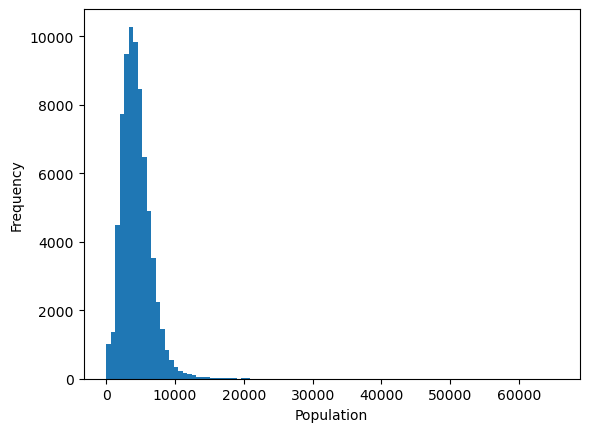

In [ ]:
#My code
#Graphing the total population by binning 
plt.hist(df["TotalPop"], bins=100)
plt.xlabel('Population')
plt.ylabel('Frequency')

In [ ]:
#My code
# getting rid of data without population, as seen in above chart 0 is not acceptable
df = df.loc[df['TotalPop'] > 0]
df[["State","County","Income", 'TotalPop']].sort_values(by = "TotalPop", ascending = False)

,State,County,Income,TotalPop
63656,Texas,Fort Bend County,148974.0,65528
63652,Texas,Fort Bend County,100801.0,47744
62174,Texas,Brazoria County,107178.0,40883
9724,California,San Diego County,41709.0,40402
18180,Florida,Sumter County,64681.0,40256
...,...,...,...,...
44168,New York,Erie County,NaN,4
46863,New York,Queens County,NaN,3
55761,Pennsylvania,Allegheny County,NaN,3
73348,Puerto Rico,Ceiba Municipio,NaN,2


In [ ]:
#My code
#That is better.  Now we got rid of populations of zero.  Lets sort by income now
df[["State","County","TractId","Income", 'TotalPop']].sort_values(by = "Income", ascending = False)

,State,County,TractId,Income,TotalPop
10787,California,Santa Clara County,6085511701,249750.0,4518
62889,Texas,Dallas County,48113013300,249219.0,1991
47955,New York,Westchester County,36119005400,248438.0,1653
63180,Texas,Dallas County,48113019700,246389.0,1838
63177,Texas,Dallas County,48113019501,246172.0,7544
...,...,...,...,...,...
73774,Puerto Rico,San Juan Municipio,72127004800,NaN,3092
73787,Puerto Rico,San Juan Municipio,72127005402,NaN,1738
73853,Puerto Rico,San Juan Municipio,72127980000,NaN,23
73856,Puerto Rico,San Juan Municipio,72127980103,NaN,1596


In [ ]:
#My code
#hmm, we have some NaN values. Lets remove these rows from the table as well
df = df.dropna()
df[["State","County","Income", 'TotalPop']].sort_values(by = "Income", ascending = False)

,State,County,Income,TotalPop
10787,California,Santa Clara County,249750.0,4518
62889,Texas,Dallas County,249219.0,1991
47955,New York,Westchester County,248438.0,1653
63180,Texas,Dallas County,246389.0,1838
63177,Texas,Dallas County,246172.0,7544
...,...,...,...,...
73581,Puerto Rico,Mayagüez Municipio,3327.0,2002
73325,Puerto Rico,Cataño Municipio,3125.0,1886
73121,Puerto Rico,Arecibo Municipio,2924.0,3290
73742,Puerto Rico,San Juan Municipio,2702.0,5161


In [ ]:
#now we have valid population and income data, which is essential since we are predicting income based off population traits.
#I am now going to attempt to build a model to predict income.
# to do so I will first normalize everything. In order to do that I have to drop the string based columns, and useless columns

In [ ]:
#Not my code
df= df.drop(['TractId', 'State', 'County','IncomeErr','IncomePerCap','IncomePerCapErr'], axis=1)
df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [ ]:
#Men, women, voteagecitizen, and employed are all numbers, when they should really be percentages...

In [ ]:
#Not my code
to_percent = ['Men','Women','VotingAgeCitizen','Employed']
df[to_percent] = df[to_percent].div(df["TotalPop"], axis="index")*100

In [ ]:
#My code
df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1845,48.726287,51.273713,2.4,86.3,5.2,0.0,1.2,0.0,76.260163,...,0.5,0.0,2.1,24.5,47.750678,74.2,21.2,4.5,0.0,4.6
1,2172,53.729282,46.270718,1.1,41.6,54.5,0.0,1.0,0.0,76.058932,...,0.0,0.5,0.0,22.2,39.226519,75.9,15.0,9.0,0.0,3.4
2,3385,45.288035,54.711965,8.0,61.4,26.5,0.6,0.7,0.4,73.264402,...,1.0,0.8,1.5,23.1,43.781388,73.3,21.1,4.8,0.7,4.7
3,4267,46.894774,53.105226,9.6,80.3,7.1,0.5,0.2,0.0,76.329974,...,1.5,2.9,2.1,25.9,43.332552,75.8,19.7,4.5,0.0,6.1
4,9965,50.717511,49.282489,0.9,77.5,16.4,0.0,3.1,0.0,72.543904,...,0.8,0.3,0.7,21.0,48.038133,71.4,24.1,4.5,0.0,2.3


In [ ]:
#Not my code
#lets make "income" the last column
cols = list(df.columns.values)
cols.pop(cols.index('Income')) 
df = df[cols+['Income']]
df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
0,1845,48.726287,51.273713,2.4,86.3,5.2,0.0,1.2,0.0,76.260163,...,0.0,2.1,24.5,47.750678,74.2,21.2,4.5,0.0,4.6,67826.0
1,2172,53.729282,46.270718,1.1,41.6,54.5,0.0,1.0,0.0,76.058932,...,0.5,0.0,22.2,39.226519,75.9,15.0,9.0,0.0,3.4,41287.0
2,3385,45.288035,54.711965,8.0,61.4,26.5,0.6,0.7,0.4,73.264402,...,0.8,1.5,23.1,43.781388,73.3,21.1,4.8,0.7,4.7,46806.0
3,4267,46.894774,53.105226,9.6,80.3,7.1,0.5,0.2,0.0,76.329974,...,2.9,2.1,25.9,43.332552,75.8,19.7,4.5,0.0,6.1,55895.0
4,9965,50.717511,49.282489,0.9,77.5,16.4,0.0,3.1,0.0,72.543904,...,0.3,0.7,21.0,48.038133,71.4,24.1,4.5,0.0,2.3,68143.0


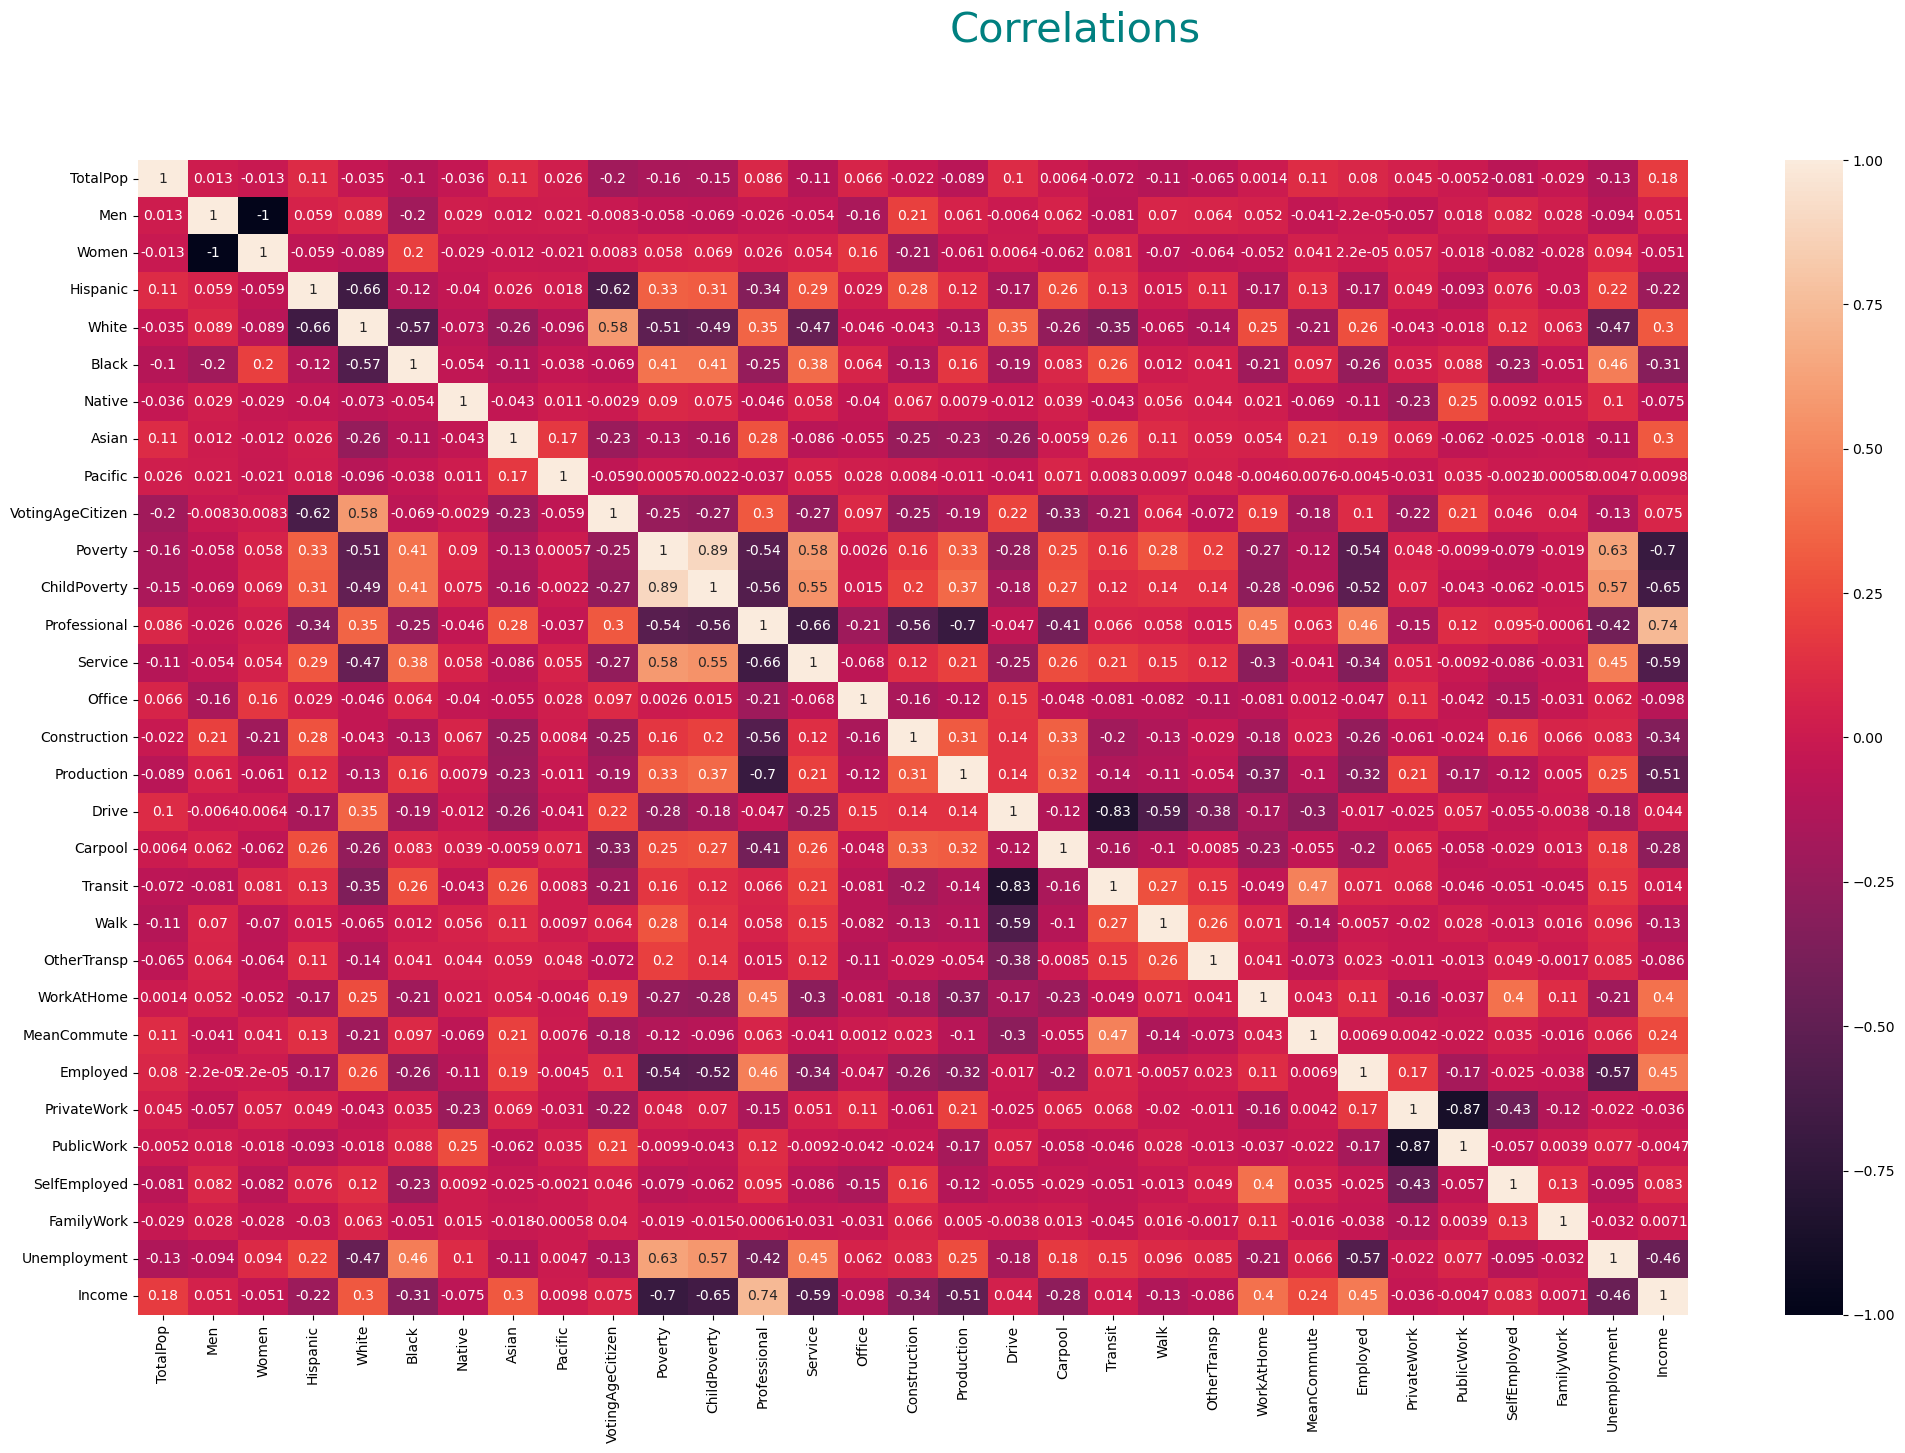

In [ ]:
#My code
#Making a heatmap to see some basic corelations on our cleaned data
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
#Not my code
#split data into test and validation set
X= df.drop(["Income"], axis=1)
y= df.Income
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Black box methods imports , not my code
from time import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [ ]:
#Not my code
#making pipeline to predict using 95% variance
pca95 = PCA(.95)
pipe95 = Pipeline(steps=[
             ("scaler", StandardScaler()),
             ("imputer", SimpleImputer()),
             ("pca", pca95)])
X_train= pipe95.fit_transform(X_train)
X_test= pipe95.transform(X_test)
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [ ]:
#My code mixed with borrowed; basically tweaked borrowed code to run KNN for K=1 through 20 rather than various regression models.
models = [
    KNeighborsRegressor(1),
    KNeighborsRegressor(2),
    KNeighborsRegressor(3),
    KNeighborsRegressor(4),
    KNeighborsRegressor(5),
    KNeighborsRegressor(6),
    KNeighborsRegressor(7),
    KNeighborsRegressor(8),
    KNeighborsRegressor(9),
    KNeighborsRegressor(10),
    KNeighborsRegressor(11),
    KNeighborsRegressor(12),
    KNeighborsRegressor(13),
    KNeighborsRegressor(14),
    KNeighborsRegressor(15),
    KNeighborsRegressor(16),
    KNeighborsRegressor(17),
    KNeighborsRegressor(18),
    KNeighborsRegressor(19),
    KNeighborsRegressor(20),


]

for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor(n_neighbors=1)
	Training time: 0.004s
	Prediction time: 18.427s
	Explained variance: 0.6327766223099187
	Mean absolute error: 12709.346754675467
	R2 score: 0.6305106864702681

KNeighborsRegressor(n_neighbors=2)
	Training time: 0.003s
	Prediction time: 19.380s
	Explained variance: 0.7330374076252189
	Mean absolute error: 10953.924642464246
	R2 score: 0.730883968173358

KNeighborsRegressor(n_neighbors=3)
	Training time: 0.000s
	Prediction time: 20.963s
	Explained variance: 0.7659562030620104
	Mean absolute error: 10254.19202420242
	R2 score: 0.7635423990839756

KNeighborsRegressor(n_neighbors=4)
	Training time: 0.002s
	Prediction time: 26.409s
	Explained variance: 0.7830980536404236
	Mean absolute error: 9897.539727722773
	R2 score: 0.7804608906798179

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 26.687s
	Explained variance: 0.792914176222594
	Mean absolute error: 9671.754686468648
	R2 score: 0.7902540754745053

KNeighborsRegressor(n_neighbors=6)
	Tr

In [ ]:
#My code, graphing the R2 scores for each K-value
import plotly.express as px
neighborR2Score=[0.6305106864702681, 0.730883968173358,0.7635423990839756, 0.7804608906798179, 0.7902540754745053, 0.7963697785317498, 0.799576736833832, 0.8022030389843057, 0.8040777007956099, 0.8056686947899272, 0.8060101262608639, 0.8071254572122596, 0.8083561630714475, 0.8090168880460439, 0.8091449301279272, 0.8090440246714543, 0.8088240740728977, 0.808838795094931, 0.8088942130715867, 0.8085630694800581 ]
numNeighbors = np.zeros(20)
for i in range(0, 20):
    numNeighbors[i]=i
errorData= {'K-value': numNeighbors, 'R2-Error': neighborR2Score}
data= pd.DataFrame(errorData)
data.head()
px.line(data, x='K-value', y='R2-Error')

In [ ]:
#Borrowed code, with a couple tweaks by me, with adding a couple regression models
#clearly, K value reaches an asympote at K=8, so we will stick with that as our K-value.
#I am going to see how KNN compares to other black box methods also using the same training/test data sets to see if we would be better off using other methods
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
otherModels = [
    KNeighborsRegressor(8),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    GaussianNB(),
    MultinomialNB()
]

for model in otherModels:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor(n_neighbors=8)
	Training time: 0.059s
	Prediction time: 51.342s
	Explained variance: 0.8049936536111437
	Mean absolute error: 9423.684818481848
	R2 score: 0.8022030389843057

LinearRegression()
	Training time: 0.130s
	Prediction time: 0.008s
	Explained variance: 0.7134791196594574
	Mean absolute error: 11497.984484393637
	R2 score: 0.7134623381802284

DecisionTreeRegressor()
	Training time: 3.347s
	Prediction time: 0.013s
	Explained variance: 0.6073016449082413
	Mean absolute error: 13084.7999449945
	R2 score: 0.607154230262001

RandomForestRegressor()
	Training time: 172.023s
	Prediction time: 0.913s
	Explained variance: 0.8160793669788696
	Mean absolute error: 8914.95866721672
	R2 score: 0.8159465129501728

GradientBoostingRegressor()
	Training time: 64.125s
	Prediction time: 0.050s
	Explained variance: 0.7997597444564002
	Mean absolute error: 9357.221687022247
	R2 score: 0.7997562554613711

GaussianNB()
	Training time: 9.247s
	Prediction time: 718.039s
	Explained

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
#My code, graphing the R2 scores of the various regression models
modelR2Score=[0.8022030389843057,0.7134623381802284,0.607154230262001, 0.8159465129501728, 0.7997562554613711, 0.5663088846243652]
modelNames= ["KNeighbors", "LinearRegression", "DecisionTree", "RandomForest", "GradientBoosting", "GaussianNB"]

errorData= {'Model': modelNames, 'R2-Error': modelR2Score}
data= pd.DataFrame(errorData)
data.head()
px.histogram(data, x="R2-Error", y="Model")

In [ ]:
# So Random Forrest is the winner by an inch here. Barely edges out KNeighbors.